# Proyek Analisis Data: E-commerce-public-dataset
- **Nama:** Anak Agung Ayu Citra Maharani
- **Email:** agungcitra2717@gmail.com
- **ID Dicoding:** anak_agung876

## Menentukan Pertanyaan Bisnis

- Apa saja kategori produk yang paling laku dan paling tidak laku?
- Bagaimana distribusi pesanan di berbagai negara bagian (state)?
- Bagaimana pengaruh durasi pengiriman terhadap peringkat dari pelanggan (score_review)?
- Kapan terakhir pelanggan melakukan transaksi? (RFM ANALYSIS)
- Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir? (RFM ANALYSIS)
- Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir? (RFM ANALYSIS)
- Bagaimana pelanggan dapat disegmentasikan berdasarkan kebiasaan pembelian mereka? (RFM ANALYSIS)

## Import Semua Packages/Library yang Digunakan

In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Wrangling

### Gathering Data

In [294]:
customers_df = pd.read_csv("data/customers_dataset.csv")
geolocation_df = pd.read_csv("data/geolocation_dataset.csv")
order_items_df = pd.read_csv("data/order_items_dataset.csv")
order_payments_df = pd.read_csv("data/order_payments_dataset.csv")
order_reviews_df = pd.read_csv("data/order_reviews_dataset.csv")
orders_df = pd.read_csv("data/orders_dataset.csv")
product_category_name_df = pd.read_csv("data/product_category_name_translation.csv")
products_df = pd.read_csv("data/products_dataset.csv")
sellers_df = pd.read_csv("data/sellers_dataset.csv")

In [295]:
print('\n', customers_df.head())
print('\n', geolocation_df.head())
print('\n', order_items_df.head())
print('\n', order_payments_df.head())
print('\n', order_reviews_df.head())
print('\n', orders_df.head())
print('\n', product_category_name_df.head())
print('\n', products_df.head())
print('\n', sellers_df.head())


                         customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  

    geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1            

### Assessing Data

#### Check for basic information each dataframe

In [296]:
print('\n', customers_df.info())
print('\n', geolocation_df.info())
print('\n', order_items_df.info())
print('\n', order_payments_df.info())
print('\n', order_reviews_df.info())
print('\n', orders_df.info())
print('\n', product_category_name_df.info())
print('\n', products_df.info())
print('\n', sellers_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non

#### Check for Nan value in column

In [297]:
print("\n",customers_df.isna().sum())
print("\n",geolocation_df.isna().sum())
print("\n",order_items_df.isna().sum())
print("\n",order_payments_df.isna().sum())
print("\n",order_reviews_df.isna().sum())
print("\n",orders_df.isna().sum())
print("\n",product_category_name_df.isna().sum())
print("\n",products_df.isna().sum())
print("\n",sellers_df.isna().sum())


 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

 order_id                            0
customer_id                       

#### Check for duplicate data in dataframe

In [298]:
print("Jumlah duplikasi customers_df\t\t\t: ", customers_df.duplicated().sum())
print("Jumlah duplikasi geolocation_df\t\t\t: ", geolocation_df.duplicated().sum())
print("Jumlah duplikasi order_items_df\t\t\t: ", order_items_df.duplicated().sum())
print("Jumlah duplikasi order_payments_df\t\t: ", order_payments_df.duplicated().sum())
print("Jumlah duplikasi order_reviews_df\t\t: ", order_reviews_df.duplicated().sum())
print("Jumlah duplikasi orders_df\t\t\t: ", orders_df.duplicated().sum())
print("Jumlah duplikasi product_category_name_df\t: ", product_category_name_df.duplicated().sum())
print("Jumlah duplikasi products_df\t\t\t: ", products_df.duplicated().sum())
print("Jumlah duplikasi sellers_df\t\t\t: ", sellers_df.duplicated().sum())

Jumlah duplikasi customers_df			:  0
Jumlah duplikasi geolocation_df			:  261831
Jumlah duplikasi order_items_df			:  0
Jumlah duplikasi order_payments_df		:  0
Jumlah duplikasi order_reviews_df		:  0
Jumlah duplikasi orders_df			:  0
Jumlah duplikasi product_category_name_df	:  0
Jumlah duplikasi products_df			:  0
Jumlah duplikasi sellers_df			:  0


#### Check detail in each dataframe's feature

In [299]:
print("\n",customers_df.describe())
print("\n",geolocation_df.describe())
print("\n",order_items_df.describe())
print("\n",order_payments_df.describe())
print("\n",order_reviews_df.describe())
print("\n",orders_df.describe())
print("\n",product_category_name_df.describe())
print("\n",products_df.describe())
print("\n",sellers_df.describe())


        customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000

        geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     1.000163e+06
mean                  3.657417e+04    -2.117615e+01    -4.639054e+01
std                   3.054934e+04     5.715866e+00     4.269748e+00
min                   1.001000e+03    -3.660537e+01    -1.014668e+02
25%                   1.107500e+04    -2.360355e+01    -4.857317e+01
50%                   2.653000e+04    -2.291938e+01    -4.663788e+01
75%                   6.350400e+04    -1.997962e+01    -4.376771e+01
max                   9.999000e+04     4.506593e+01     1.211054e+02

        order_item_id          price  freight_value
count  112650.000000  112650.00000

**Insight:**

Dari proses penilaian terhadap masing - masing dataframe di atas ditemukan beberapa masalah yaitu
Missing Value
- Terdapat Nan value di 2 kolom order_review_df. Hal ini terjadi karena saat proses review, terdapat beberapa pelanggan yang tidak melengkapi keseluruhan inputan review (non-required)
- Terdapat Nan value di 3 kolom orders_df. Nan value dalam kolom tersebut disebabkan karena dataframe ini merupakan dataframe yang mencatat proses order hingga sampai ke pelanggan. Namun karena beberapa order masih belum sampai ke pelanggan atau masih diproses menyebabkan kolom tersebut Nan.
- Terakhir terdapat Nan value di keseluruhan kolom yang ada dalam products_df

Duplicated rows
- Terdapat duplikasi data dalam geolocation_df sebanyak 261.831 rows

### Cleaning Data

#### Geolocation Dataframe

In [300]:
print("Jumlah duplikasi geolocation_df :", geolocation_df.duplicated().sum())

Jumlah duplikasi geolocation_df : 261831


In [301]:
geolocation_df.drop_duplicates(inplace=True)

In [302]:
print("Jumlah duplikasi geolocation_df :", geolocation_df.duplicated().sum())

Jumlah duplikasi geolocation_df : 0


#### Order reviews dataframe

In [303]:
print("\n",order_reviews_df.isna().sum())


 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


In [304]:
order_reviews_df.fillna(value="-", inplace=True)

In [305]:
order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [306]:
# change to datetime type
order_datetime = ["review_creation_date", "review_answer_timestamp"]

for column in order_datetime:
    order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [307]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


#### Order dataframe

In [308]:
print("\n",orders_df.isna().sum())


 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [309]:
orders_df = orders_df.dropna(how="any")

In [310]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [311]:
# change to datetime type
order_datetime = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in order_datetime:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [312]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


#### order items df

In [313]:
# change to datetime type
order_items_df["shipping_limit_date"] = pd.to_datetime(order_items_df["shipping_limit_date"])

In [314]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Insight:**
- Asumsikan bahwa geolocation_df berisi semua lokasi unik dalam kerangka data, jadi kita perlu menghapus data duplikat tersebut.
- Dari proses penilaian, kita mengetahui bahwa ada beberapa kolom dalam data order_reviews yang berisi missing value. Jadi kita perlu mengisinya.
- Dilakukan proses drop terhadap rows berisi missing value di orders_df sehingga dapat lebih mudah untuk mengkonversi type datanya

## Exploratory Data Analysis (EDA)

- Apa saja kategori produk yang paling laku dan paling tidak laku?
- Bagaimana distribusi pesanan di berbagai negara bagian (state)?
- Bagaimana pengaruh durasi pengiriman terhadap peringkat dari pelanggan (score_review)?
- Bagaimana pelanggan dapat disegmentasikan berdasarkan kebiasaan pembelian mereka? (RFM ANALYSIS)

### Explore customers_df

In [315]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
22631,5015b446c93382510a9e662ef293c54e,8a0b86964fbc397870ec771b25a42243,13660,porto ferreira,SP
85334,334fa9ca22bbc6345adc605f2abd1cde,d1083569a0a2dc25755edb078a454017,72405,brasilia,DF
4667,2d24fed1756a77452cee7d8dd4375c61,38af56df02d66ad92f55b4430c2af9ca,24230,niteroi,RJ
80393,7f6cabc1cfc4fa9e3db23f6dd1ea6317,d36f96e1eda5c86966988768b21d34d0,38600,paracatu,MG
49493,29bdfd7cb1c6a9ef72c7ddddab1fa3c7,43c73f9043398f0dd2163fc5f825e61a,30770,belo horizonte,MG


In [316]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [317]:
customers_df.customer_id.is_unique

True

In [318]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
agisse                1
vieiras               1
bertopolis            1
abadiania             1
xexeu                 1
Name: customer_id, Length: 4119, dtype: int64

In [319]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### Explore geolocation_df

In [320]:
geolocation_df.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
837174,79310,-19.015347,-57.647476,corumbá,MS
382506,18147,-23.432149,-47.067145,aracariguama,SP
698100,47100,-11.089769,-43.146250,barra,BA
788752,72236,-15.847265,-48.116701,brasilia,DF
918302,88811,-28.666578,-49.359867,criciuma,SC


In [321]:
geolocation_df.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738332.000000,738332.000000,738332.000000,738332,738332
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,79927,285976
mean,38316.086800,-20.998353,-46.461098,NaN,NaN
std,30632.496675,5.892315,4.393705,NaN,NaN
min,1001.000000,-36.605374,-101.466766,NaN,NaN
25%,12600.000000,-23.603061,-48.867822,NaN,NaN
50%,29144.000000,-22.873588,-46.647278,NaN,NaN
75%,65950.000000,-19.923336,-43.836974,NaN,NaN


In [322]:
geolocation_df.groupby("geolocation_state").geolocation_city.nunique().sort_values(ascending=False)

geolocation_state
MG    1426
SP    1048
RS     691
BA     652
PR     651
SC     420
GO     384
MA     299
PI     278
PE     267
CE     260
PB     254
RJ     245
PA     219
RN     214
MT     213
TO     173
ES     160
MS     133
AL     130
SE      96
RO      83
AM      74
AC      34
DF      28
AP      17
RR      14
Name: geolocation_city, dtype: int64

#### Explore order_items_df

In [323]:
order_items_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
80123,b646230340125ccb34ad274da72e2d55,1,0cb61dc7daa0bf5e31e9ac3ba8fba86e,99eaacc9e6046db1c82b163c5f84869f,2017-08-03 11:00:13,199.00,16.14
85494,c235e3fbe42d171c9177e6664107170d,1,dcb7642f668e09b75d526454940124b9,92eb0f42c21942b6552362b9b114707d,2017-07-07 19:25:13,12.50,7.78
27799,3f41fd6ddaad5817115c0d99360ad3e6,1,5a719c85a2cad2da6076ea511aa4023f,3340ef1913fb70d28420f6ceb685c339,2017-11-30 03:12:47,177.99,16.00
72838,a60cc6832b1b78e7cc684d7c82b1be03,1,d2f5484cbffe4ca766301b21ab9246dd,36a968b544695394e4e9d7572688598f,2017-10-10 14:28:55,12.88,15.10
21048,302a306110f1644dba1d952dc291fd4c,2,b570f2a8228eeaa87e224f25264576b5,da8622b14eb17ae2831f4ac5b9dab84a,2018-01-03 04:07:24,84.90,46.86


In [324]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


In [325]:
order_items_df.groupby(by="order_id").agg({
    "price": ["sum"]
})

,price
,sum
order_id,
00010242fe8c5a6d1ba2dd792cb16214,58.90
00018f77f2f0320c557190d7a144bdd3,239.90
000229ec398224ef6ca0657da4fc703e,199.00
00024acbcdf0a6daa1e931b038114c75,12.99
00042b26cf59d7ce69dfabb4e55b4fd9,199.90
...,...
fffc94f6ce00a00581880bf54a75a037,299.99
fffcd46ef2263f404302a634eb57f7eb,350.00


#### Explore order_payments_df

In [326]:
order_payments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
1314,6d9e993faed56b20fe3f762fd8bbf24f,1,credit_card,2,64.04
5109,a533be8e152c88d32586ff0c9c230ba2,1,credit_card,4,102.84
96949,1982a20c2a9d116da964e488d59eebe7,1,credit_card,3,34.37
4521,b8e11074d7fd4b6123ebcc4af964381c,1,boleto,1,88.19
23788,8c992e982ae4be70f1aaa3ee623bc042,1,boleto,1,114.25


In [327]:
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [328]:
order_payments_df.groupby(by="payment_type").agg({
    "payment_value": ["max", "min", "mean", "sum"]
})

payment_value                                
                       max    min        mean          sum
payment_type                                              
boleto             7274.88  11.62  145.034435   2869361.27
credit_card       13664.08   0.01  163.319021  12542084.19
debit_card         4445.50  13.38  142.570170    217989.79
not_defined           0.00   0.00    0.000000         0.00
voucher            3184.34   0.00   65.703354    379436.87

#### Explore order_reviews_df

In [329]:
order_reviews_df.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
59635,b9e868706b6abb6a8e2cdcd61e8938ac,fb30296d350b197030e65d4a2e52a1a6,4,-,-,2018-04-08,2018-04-09 22:08:48
28167,b61ee9976defe6172d2b2015951bcbdd,fefde2c038077ee3f2cde28e6a6d94a7,5,-,-,2018-03-24,2018-03-25 19:01:52
52460,ae7ef22d0ab18c1c2b172e47ae380de7,b4a2d8c2d3ee496cb458b05f6d52b538,1,-,"Comprei uma capa e uma película de vidro, a pe...",2017-05-11,2017-06-01 11:59:13
38517,a7b26cdca04446470bcc89cd61e1ef4b,b3e51e0ed55ecfc735545f286635be5a,4,-,-,2017-10-22,2017-10-26 23:01:01
55858,3926229626f392d7f66ab3164cd4ff0d,5e021cdf9b42799cd60d771910e43008,5,-,-,2018-03-30,2018-03-31 09:33:48


In [330]:
order_reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4527,36159,NaN,NaN
top,08528f70f579f0c830189efc523d2182,df56136b8031ecd28e200bb18e6ddb2e,NaN,-,-,NaN,NaN
freq,3,3,NaN,87657,58250,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


In [331]:
order_reviews_df.groupby("review_score").agg({
    "order_id" : "nunique"
})

,order_id
review_score,
1,11393
2,3148
3,8160
4,19098
5,57076


#### Explore orders_df

In [332]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
31228,dfe5f68118c2576143240b8d78e5940a,8f6ceed676a529b29619a598b377de08,delivered,2017-03-17 12:32:22,2017-03-17 12:32:22,2017-03-21 18:28:04,2017-09-19 18:13:19,2017-04-19
90802,f1e63d984de289ace77245034ae6cbdb,e5f8e8729146fd86c86830782eadca4c,delivered,2017-08-19 15:12:05,2017-08-19 15:25:16,2017-08-24 21:59:54,2017-09-05 23:24:37,2017-09-19
97757,17be127e33c5c47d99de1dd43f35c951,c6961250979dfd4fb65cd0e7802d3cee,delivered,2018-08-08 22:33:02,2018-08-08 22:45:12,2018-08-09 14:42:00,2018-08-13 15:48:42,2018-08-29
38847,f3d1138add2934e968eaa91ce26da835,2845c3b58bbe2eb1dd1db586ae2badb3,delivered,2018-08-20 19:44:22,2018-08-20 19:55:16,2018-08-21 13:06:00,2018-08-22 17:58:49,2018-08-23
37280,8773f85e9426581a87796b56cdd8eff5,1ceac3bdaa825ff830917e131f85a2ce,delivered,2018-05-05 09:50:33,2018-05-05 10:13:54,2018-05-07 11:52:00,2018-05-11 14:08:46,2018-05-29


In [333]:
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,7.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,21.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,24.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,13.0


#### Explore sellers_df

In [334]:
sellers_df.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
513,48436dade18ac8b2bce089ec2a041202,27277,volta redonda,SP
3076,9e6967d3cf386d284251784b18ccb485,9550,sao caetano do sul,SP
2114,f214d28e8d8e3ef068748498ccc2f813,3872,sao paulo,SP
217,657969cca82e884d272385ec0ef06edd,93608,estancia velha,RS
3066,87e24fc7052259b1f7f607d61c10d8be,5734,sao paulo,SP


In [335]:
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,9e25199f6ef7e7c347120ff175652c3b,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [336]:
sellers_df["seller_id"].is_unique

True

In [337]:
sellers_df.groupby("seller_city").seller_id.nunique().sort_values(ascending=False)

seller_city
sao paulo                 694
curitiba                  127
rio de janeiro             96
belo horizonte             68
ribeirao preto             52
                         ... 
aguas claras df             1
ao bernardo do campo        1
angra dos reis rj           1
vitoria de santo antao      1
vicente de carvalho         1
Name: seller_id, Length: 611, dtype: int64

### Explore customers_df and orders_df

In [338]:
cust_orders_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
cust_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,14.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,3.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,10.0


In [339]:
cust_orders_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).head(10)

customer_state
SP    40489
RJ    12351
MG    11352
RS     5342
PR     4923
SC     3547
BA     3256
DF     2080
ES     1995
GO     1957
Name: order_id, dtype: int64

#### Merge cust_orders_df and order_reviews_df

In [340]:
order_cus_review_df = pd.merge(
    left=cust_orders_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_cus_review_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2.0,88b8b52d46df026a9d1ad2136a59b30b,4.0,-,-,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,14.0,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,-,-,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,3.0,5ad6695d76ee186dc473c42706984d87,5.0,-,-,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,059a801bb31f6aab2266e672cab87bc5,5.0,-,-,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,10.0,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


### Merge order_cus_review_df and order_payments_df

In [341]:
order_detail_df = pd.merge(
    left=order_cus_review_df,
    right=order_payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_detail_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,88b8b52d46df026a9d1ad2136a59b30b,4.0,-,-,2017-05-26,2017-05-30 22:34:40,1.0,credit_card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,-,-,2018-01-30,2018-02-10 22:43:29,1.0,credit_card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,5ad6695d76ee186dc473c42706984d87,5.0,-,-,2018-06-15,2018-06-15 12:10:59,1.0,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,059a801bb31f6aab2266e672cab87bc5,5.0,-,-,2018-03-29,2018-04-02 18:36:47,1.0,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52,1.0,credit_card,8.0,252.25


In [342]:
order_detail_df.groupby("review_score").agg({
    "delivery_time": ["mean"]
})

,delivery_time
,mean
review_score,
1.0,16.543295
2.0,12.565006
3.0,10.622925
4.0,9.083552
5.0,7.772207


In [343]:
order_detail_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False).head(10)

payment_type
credit_card    74302
boleto         19177
voucher         3679
debit_card      1484
Name: order_id, dtype: int64

#### Merge order_detail_df and order_items_df

In [344]:
order_items_detail_df = pd.merge(
    left=order_detail_df,
    right=order_items_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_items_detail_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
87728,4a727b3912355023c5284abd4b1c6956,41013aa51f66c28ff9d2c9d9d8340db5,30160,belo horizonte,MG,cbf5771b59c1f5688a8f8224f08607eb,delivered,2018-04-27 08:52:11,2018-04-27 09:08:35,2018-04-27 14:03:00,...,1.0,credit_card,10.0,239.42,1.0,1e8d46e0cdc62c1ffa69cc04a6f2660f,edb1ef5e36e0c8cd84eb3c9b003e486d,2018-05-04 09:08:35,220.00,19.42
82490,261c8817697d0a60fea72f6cca043535,3544017c06d0f3b358fffa7a3df9c053,35519,nova serrana,MG,73e08c12d3981af1a3cf6580a9253fb1,delivered,2018-05-07 14:28:20,2018-05-07 16:33:35,2018-05-08 07:01:00,...,1.0,credit_card,3.0,414.40,4.0,c968bbc4dfb718031488d3f109fee500,48e954b2da4f6a750c844173b347ed40,2018-05-11 16:31:29,55.76,27.12
4948,6ee2f17e3b6c33d6a9557f280edd2925,f9ae226291893fda10af7965268fb7f6,7131,guarulhos,SP,c6492b842ac190db807c15aff21a7dd6,delivered,2017-03-09 23:39:26,2017-03-09 23:39:26,2017-03-15 11:16:33,...,8.0,voucher,1.0,20.17,1.0,0449db5eede617c5fd413071d582f038,21e83881401b92b49fb09a16d3852291,2017-03-15 23:39:26,189.90,22.80
50288,4a4df909c2ef2c499e5be7d87d6349b6,fed519569d16e690df6f89cb99d4e682,20540,rio de janeiro,RJ,adcd0c83cc5c1885f8dfcf0f9db19481,delivered,2017-12-20 19:10:19,2017-12-20 19:30:26,2017-12-21 22:15:27,...,1.0,credit_card,10.0,175.88,1.0,774dd887b3739f005c7097b568000536,28ea411b354f14b1a494be4e79f0ce02,2017-12-27 19:30:26,160.00,15.88
63478,1531106e1c467cea04c233e54a383098,5e8a37a9db66531212450e6bd9a3c9ad,15056,sao jose do rio preto,SP,eb1873ec4d6a2af1c0626a7d08bd9c09,delivered,2018-05-10 17:48:41,2018-05-10 18:17:57,2018-05-11 07:23:00,...,1.0,credit_card,10.0,828.08,1.0,d2239567438e335a463191a43f2f02ff,b94cc9f10ddc85e4ba73a6f7974e7101,2018-05-18 18:17:57,799.90,28.18


#### Merge order_detail_df and order_items_df ``(all_df)``

In [345]:
all_df = pd.merge(
    left=order_items_detail_df,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
all_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,289.00,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,139.94,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,149.94,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,230.00,22.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0


In [346]:
all_df.groupby(by="product_category_name").agg({
    "price" : ["sum"]
})

,price
,sum
product_category_name,
agro_industria_e_comercio,81877.58
alimentos,29457.18
alimentos_bebidas,16209.92
artes,24176.63
artes_e_artesanato,1814.01
...,...
sinalizacao_e_seguranca,21390.63
tablets_impressao_imagem,7840.31


In [347]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118686 entries, 0 to 118685
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    118686 non-null  object        
 1   customer_unique_id             118686 non-null  object        
 2   customer_zip_code_prefix       118686 non-null  int64         
 3   customer_city                  118686 non-null  object        
 4   customer_state                 118686 non-null  object        
 5   order_id                       115706 non-null  object        
 6   order_status                   115706 non-null  object        
 7   order_purchase_timestamp       115706 non-null  datetime64[ns]
 8   order_approved_at              115706 non-null  datetime64[ns]
 9   order_delivered_carrier_date   115706 non-null  datetime64[ns]
 10  order_delivered_customer_date  115706 non-null  datetime64[ns]
 11  

In [348]:
all_df = all_df.dropna(how="any")
all_df = all_df.drop_duplicates()

In [349]:
# Construct the path to the Dashboard folder
dashboard_folder = 'Dashboard'
file_name = 'all_data.csv'
file_path = os.path.join(dashboard_folder, file_name)

# Export the DataFrame to CSV
all_df.to_csv(file_path, index=False)

**Insight:**
- Setelah dilakukan proses penggabungan(merging) dari dataframe keseluruhan, didapat beberapa missing value dan duplicated value yang perlu dilakukan drop (penghapusan) agar tidak mengganggu proses visualisasi data
- Ditambahkan juga proses export ke csv agar data dapat digunakan pada dashboard

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa saja kategori produk yang paling laku dan paling tidak laku?


In [350]:
sum_order_products_df = all_df.groupby("product_category_name").price.sum().sort_values(ascending=False).reset_index()
sum_order_products_df.head(15)

,product_category_name,price
0,beleza_saude,1267072.48
1,relogios_presentes,1207355.40
2,cama_mesa_banho,1081890.33
3,esporte_lazer,989555.18
4,informatica_acessorios,922482.79
5,moveis_decoracao,746376.54
6,utilidades_domesticas,646232.97
7,cool_stuff,628288.57
8,automotivo,594877.24
9,ferramentas_jardim,490316.78


C:\Users\USER\AppData\Local\Temp\ipykernel_15880\2307563227.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="price", y="product_category_name", data=sum_order_products_df.head(5), palette=colors, ax=ax[0])
C:\Users\USER\AppData\Local\Temp\ipykernel_15880\2307563227.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="price", y="product_category_name", data=sum_order_products_df.sort_values(by="price", ascending=True).head(5), palette=colors, ax=ax[1])


Text(0.5, 0.98, 'Best and Worst Performing Product Category by Total Revenue')

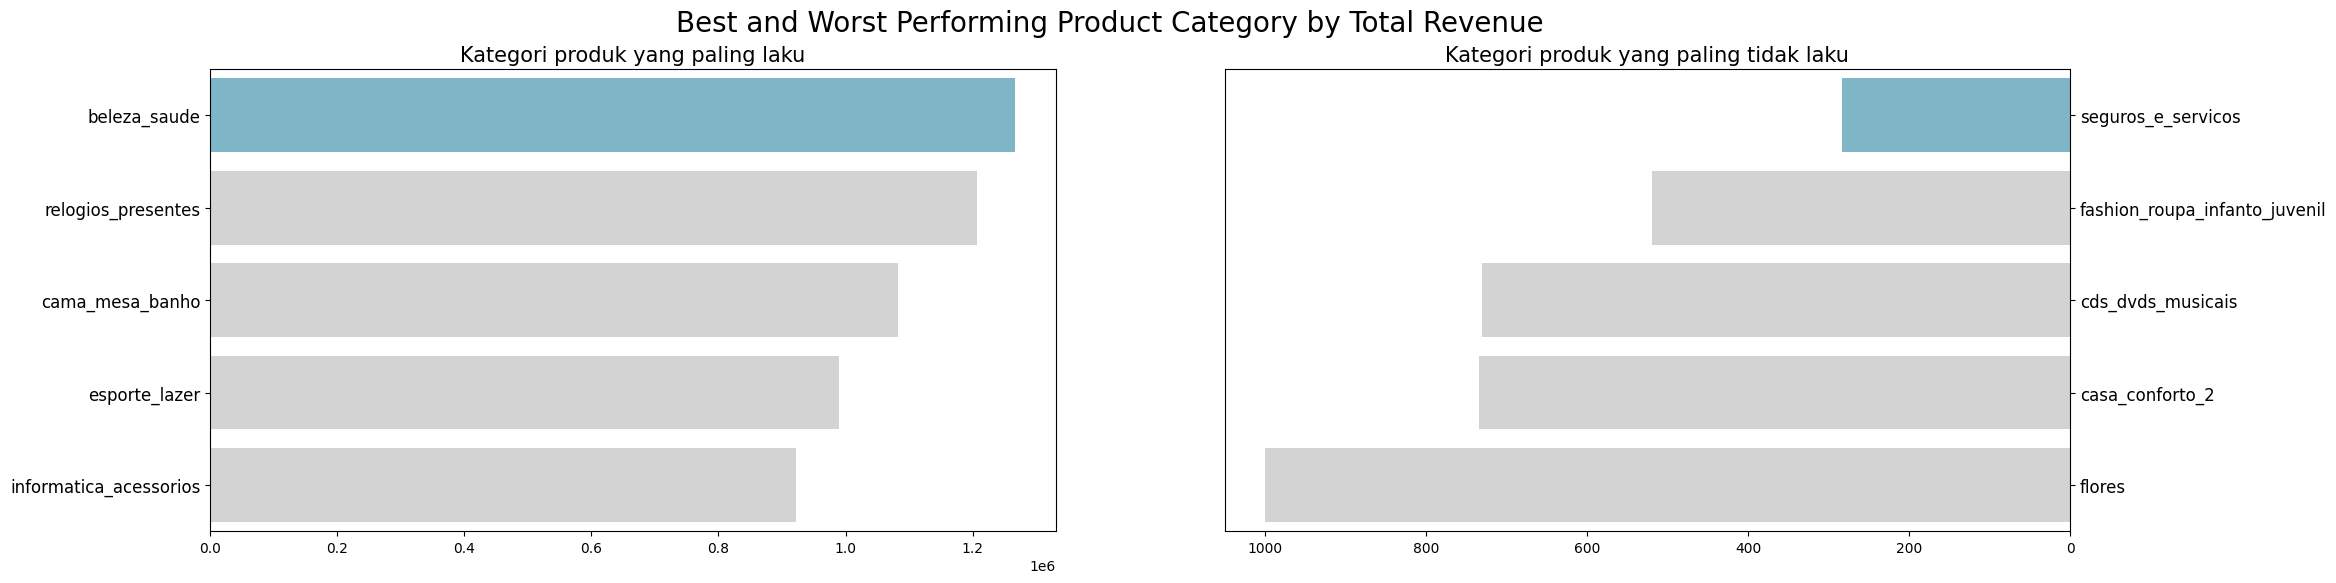

In [351]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
 
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(x="price", y="product_category_name", data=sum_order_products_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Kategori produk yang paling laku", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="price", y="product_category_name", data=sum_order_products_df.sort_values(by="price", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Kategori produk yang paling tidak laku", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Best and Worst Performing Product Category by Total Revenue", fontsize=20)

### Pertanyaan 2: Bagaimana distribusi pesanan di berbagai negara bagian (state)?

In [352]:
bystate_df = all_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).reset_index()
bystate_df

,customer_state,order_id
0,SP,39724
1,RJ,12035
2,MG,11119
3,RS,5248
4,PR,4832
5,SC,3465
6,BA,3189
7,DF,2040
8,ES,1952
9,GO,1900


In [353]:
bystate_df = all_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).reset_index()
bystate_df.rename(columns={
    "order_id" : "amount_orders"
}, inplace=True)
bystate_df

,customer_state,amount_orders
0,SP,39724
1,RJ,12035
2,MG,11119
3,RS,5248
4,PR,4832
5,SC,3465
6,BA,3189
7,DF,2040
8,ES,1952
9,GO,1900


Text(0.5, 0, 'Negara bagian (state)')

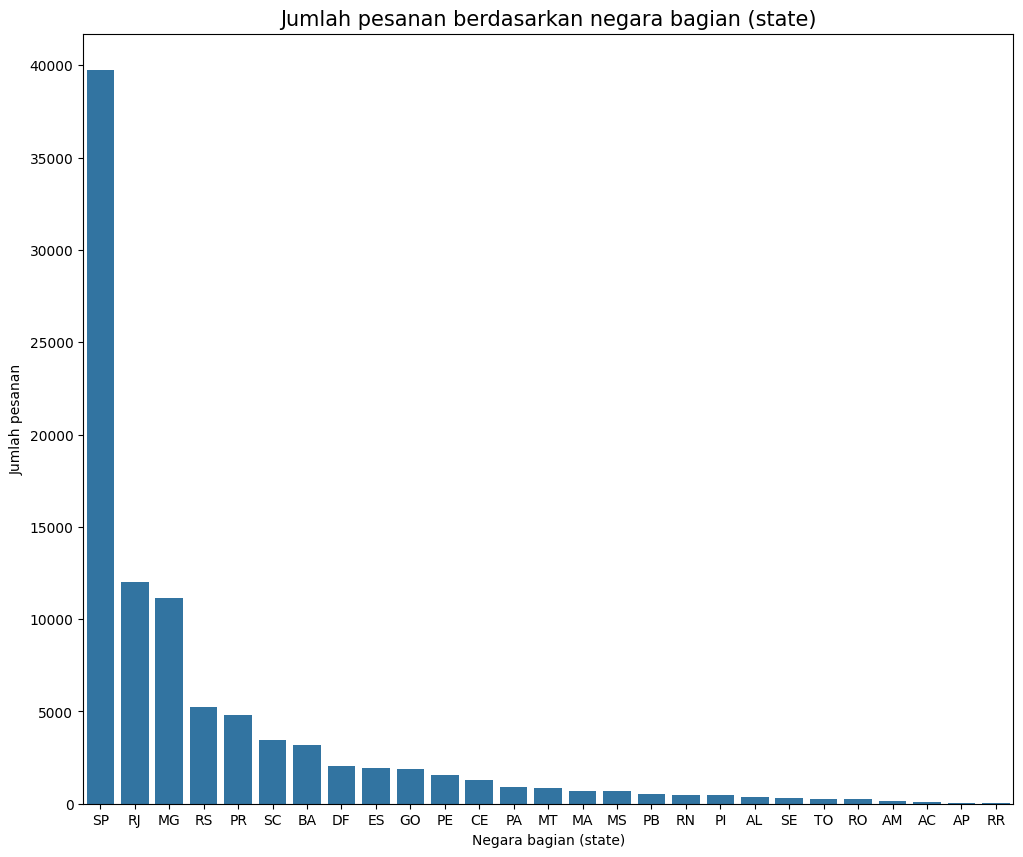

In [354]:
fig, ax = plt.subplots(nrows=1, figsize=(12, 10))

sns.barplot(
    y="amount_orders", 
    x="customer_state",
    data=bystate_df.sort_values(by="amount_orders", ascending=False)
)

plt.title("Jumlah pesanan berdasarkan negara bagian (state)", loc="center", fontsize=15)
plt.ylabel("Jumlah pesanan")
plt.xlabel("Negara bagian (state)")

## PERTANYAAN 3 : Bagaimana pengaruh dari delivery time terhadap peringkat dari pelanggan (score_review)?

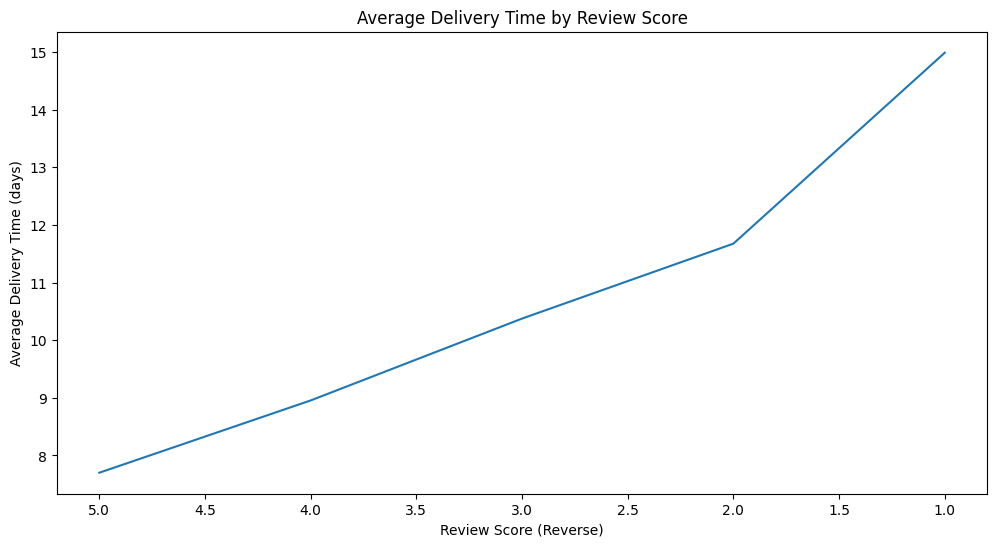

In [355]:
range_revscor_df = all_df.groupby("review_score").agg({
    "delivery_time": ["mean"]
})
fig, ax = plt.subplots(nrows=1, figsize=(12, 6))
plt.plot(range_revscor_df.index, range_revscor_df.values)
plt.gca().invert_xaxis()
plt.title("Average Delivery Time by Review Score")
plt.xlabel("Review Score (Reverse)")
plt.ylabel("Average Delivery Time (days)")

# Show the plot
plt.show()

## Analisis Lanjutan (RFM ANALYSIS)
- Recency: parameter yang digunakan untuk melihat kapan terakhir seorang pelanggan melakukan transaksi.
- Frequency: parameter ini digunakan untuk mengidentifikasi seberapa sering seorang pelanggan melakukan transaksi.
- Monetary: parameter terakhir ini digunakan untuk mengidentifikasi seberapa besar revenue yang berasal dari pelanggan tersebut.

## Pertanyaan 4 - 6:
- Kapan terakhir pelanggan melakukan transaksi?
- Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
- Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir? 

In [356]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "price": "sum" # menghitung jumlah revenue yang dihasilkan
})

# menamai ulang kolum
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date #dari datetime to date(just tanggal)
recent_date = all_df["order_purchase_timestamp"].dt.date.max() # mengambil tanggal maksimum dari all_df
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days) # max order timestamp tu terakhir masing" pelanggan melakukan transaksi, seangkan recent_date itu terakhir transaksi

# rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14,1,89.80,288
1,000161a058600d5901f007fab4c27140,2017-07-16,1,54.90,409
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28,1,179.99,547
3,0002414f95344307404f0ace7a26f1d5,2017-08-16,1,149.90,378
4,000379cdec625522490c315e70c7a9fb,2018-04-02,1,93.00,149


C:\Users\USER\AppData\Local\Temp\ipykernel_15880\701400838.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(), palette=colors, ax=ax[0])
C:\Users\USER\AppData\Local\Temp\ipykernel_15880\701400838.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(), palette=colors, ax=ax[1])
C:\Users\USER\AppData\Local\Temp\ipykernel_15880\701400838.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the

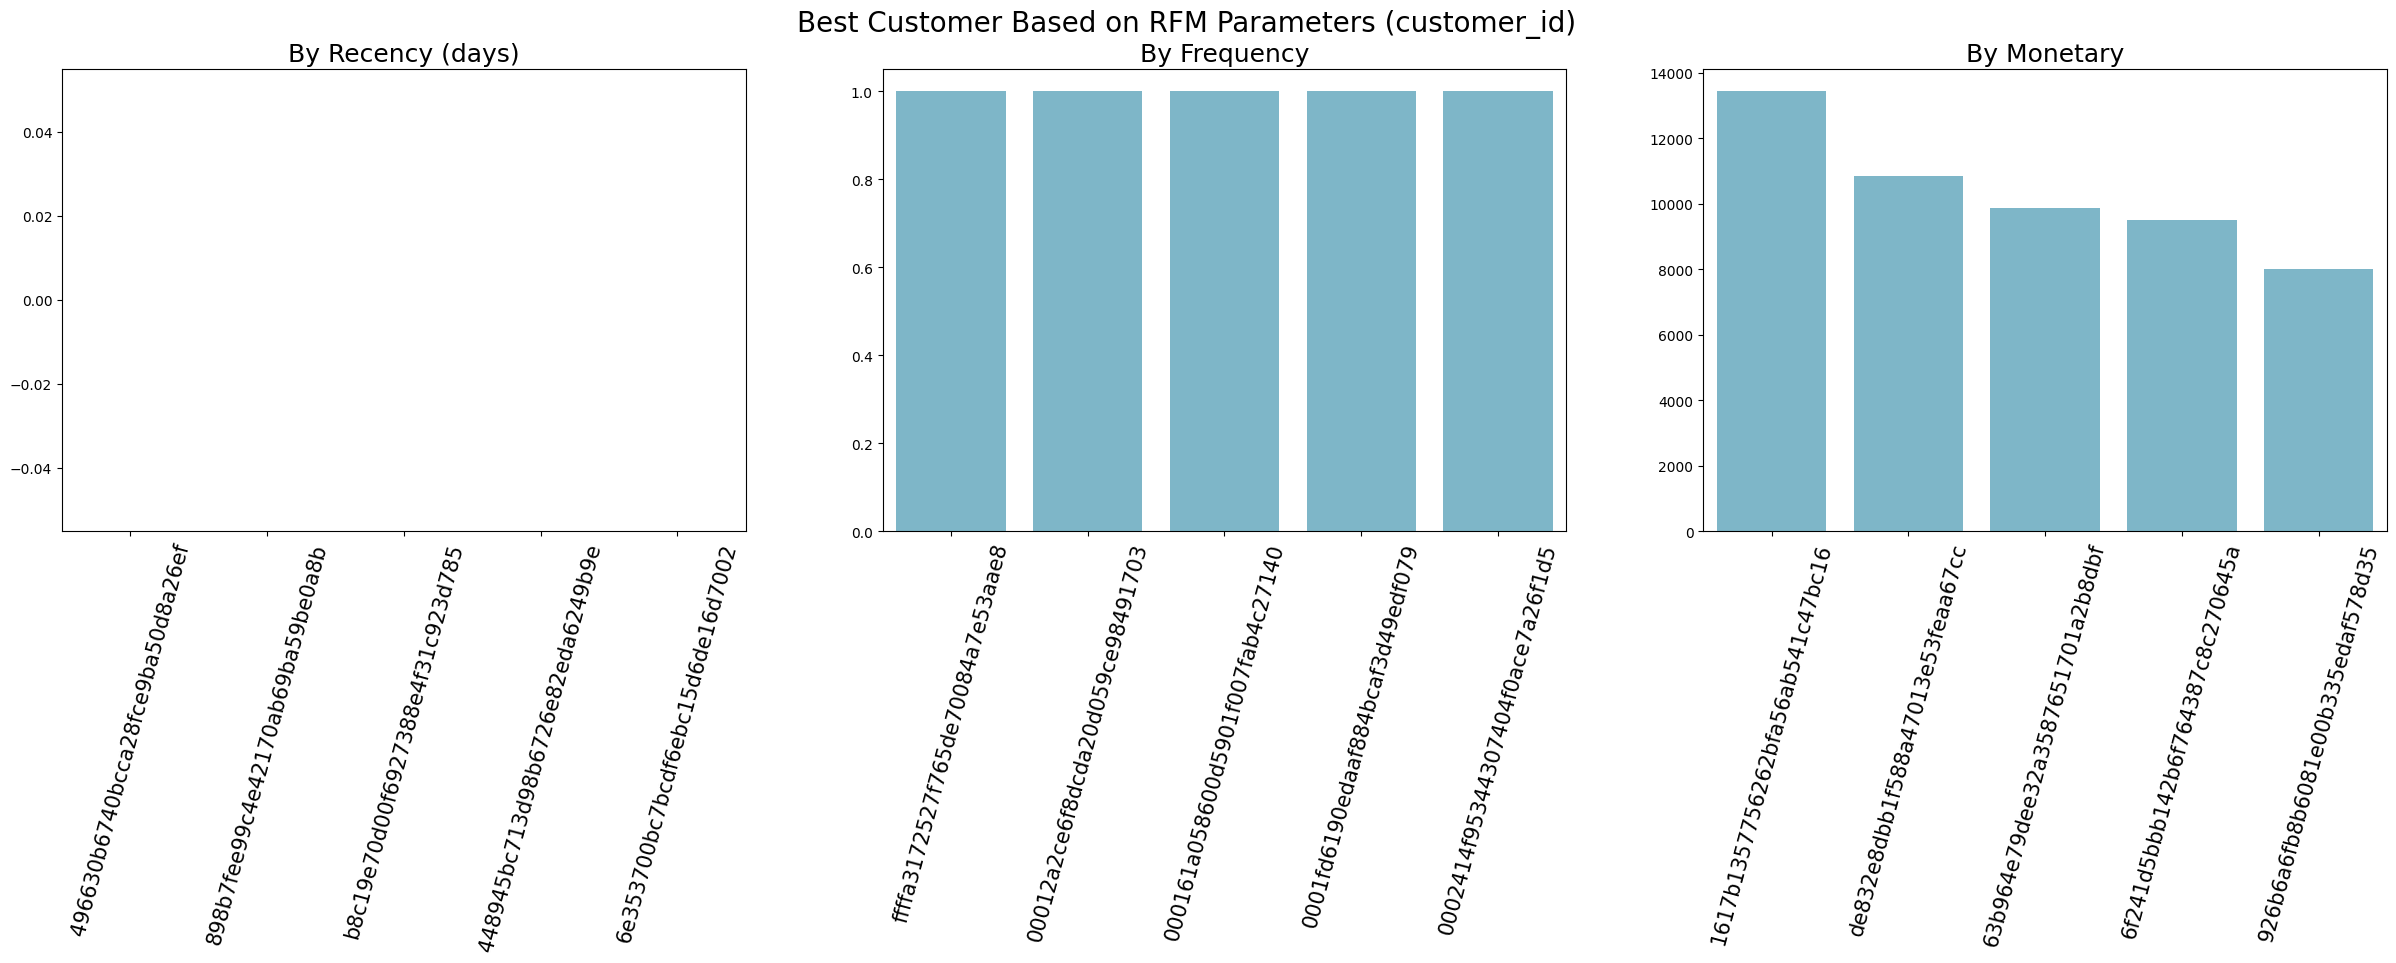

In [357]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
 
sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15, rotation=75)
 
sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis ='x', labelsize=15, rotation=75)
 
sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis ='x', labelsize=15, rotation=75)
 
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

## Pertanyaan 7 : Bagaimana pelanggan dapat disegmentasikan berdasarkan kebiasaan pembelian mereka? (RFM ANALYSIS)

In [358]:

rfm_df["recency_score"] = pd.qcut(
    rfm_df['recency'], 
    q=5,  # This is the number of quantiles (bins)
    labels=[5, 4, 3, 2, 1],  # These are your bin labels, must match the number of bins
    duplicates='drop'  # Handle duplicate edges if necessary
)
# Calculate frequency score based on rank quantiles, assigning labels from 1 to 5 (1 being lowest frequency)
rfm_df["frequency_score"] = pd.qcut(rfm_df["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

rfm_df['segment'] = rfm_df['recency_score'].astype(str) + rfm_df['frequency_score'].astype(str)
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency,recency_score,frequency_score,segment
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,288,2,1,21
1,000161a058600d5901f007fab4c27140,1,54.90,409,1,1,11
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,547,1,1,11
3,0002414f95344307404f0ace7a26f1d5,1,149.90,378,2,1,21
4,000379cdec625522490c315e70c7a9fb,1,93.00,149,4,1,41


In [359]:
# Mapping of segments to their corresponding customer segments
seg_map = {
r'[1-2][1-2]': 'hibernating',
r'[1-2][3-4]': 'at_risk',
r'[1-2]5': 'cant_loose',
r'3[1-2]': 'about_to_sleep',
r'33': 'need_attention',
r'[3-4][4-5]': 'loyal_customers',
r'41': 'promising',
r'51': 'new_customers',
r'[4-5][2-3]': 'potential_loyalists',
r'5[4-5]': 'champions'
    }

In [360]:
# Map RFM segments to corresponding customer segments using predefined seg_map
rfm_df['segment'] = rfm_df['segment'].replace(seg_map, regex=True)

# Keep only relevant columns and return the resulting dataframe
rfm_df = rfm_df[["recency", "frequency", "monetary", "segment"]]

rfm_df.index = rfm_df.index.astype(int)  # Convert index to integer
rfm_df.head()

,recency,frequency,monetary,segment
0,288,1,89.80,hibernating
1,409,1,54.90,hibernating
2,547,1,179.99,hibernating
3,378,1,149.90,hibernating
4,149,1,93.00,promising


In [361]:
rfm_df = rfm_df[["segment", "recency", "frequency", "monetary"]]


Text(0.5, 0.98, 'RFM ANALYSIS')

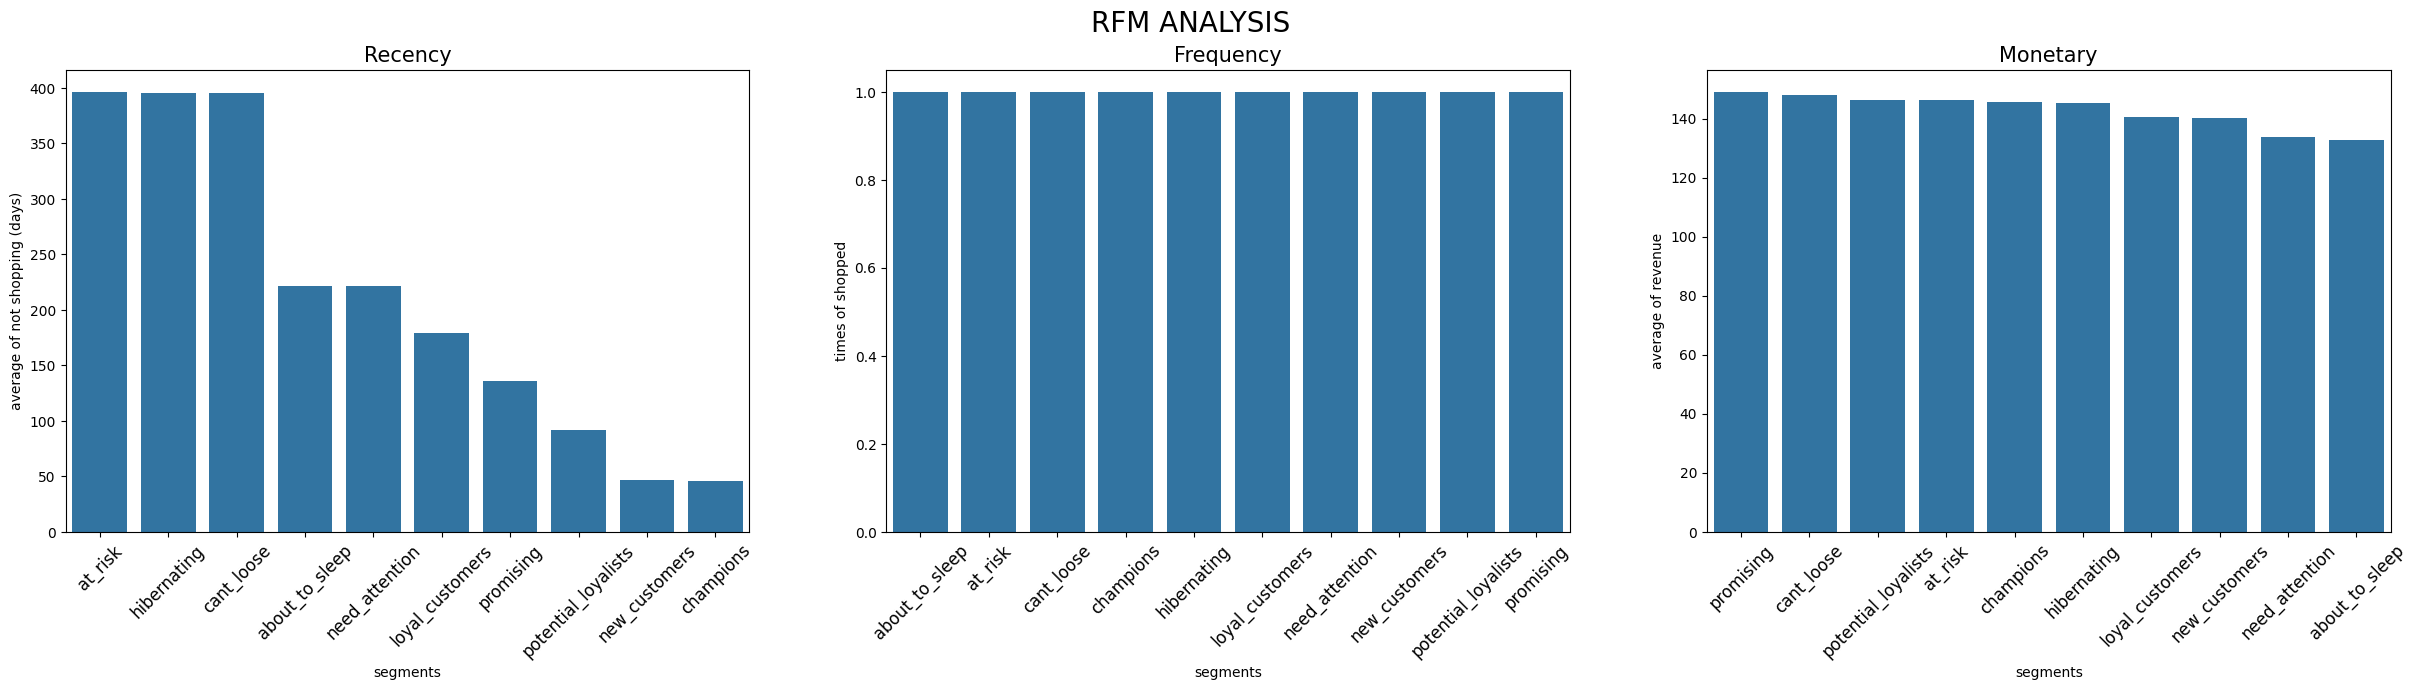

In [362]:
mean_recency = rfm_df.groupby("segment")["recency"].mean().reset_index()
mean_frequency = rfm_df.groupby("segment")["frequency"].mean().reset_index()
mean_monetary = rfm_df.groupby("segment")["monetary"].mean().reset_index()


fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
 
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(y="recency", x="segment", data=mean_recency.sort_values(by="recency", ascending=False), ax=ax[0])
ax[0].set_ylabel("average of not shopping (days)")
ax[0].set_xlabel("segments")
ax[0].set_title("Recency", loc="center", fontsize=15)
ax[0].tick_params(axis ='x', labelsize=12, rotation=45)
 
sns.barplot(y="frequency", x="segment", data=mean_frequency.sort_values(by="frequency", ascending=False), ax=ax[1])
ax[1].set_ylabel("times of shopped")
ax[1].set_xlabel("segments")
ax[1].set_title("Frequency", loc="center", fontsize=15)
ax[1].tick_params(axis ='x', labelsize=12, rotation=45)

sns.barplot(y="monetary", x="segment", data=mean_monetary.sort_values(by="monetary", ascending=False), ax=ax[2])
ax[2].set_ylabel("average of revenue")
ax[2].set_xlabel("segments")
ax[2].set_title("Monetary", loc="center", fontsize=15)
ax[2].tick_params(axis ='x', labelsize=12, rotation=45)
 
 
plt.suptitle("RFM ANALYSIS", fontsize=20)

Text(0.5, 0.98, 'Final Result RFM Analysis')

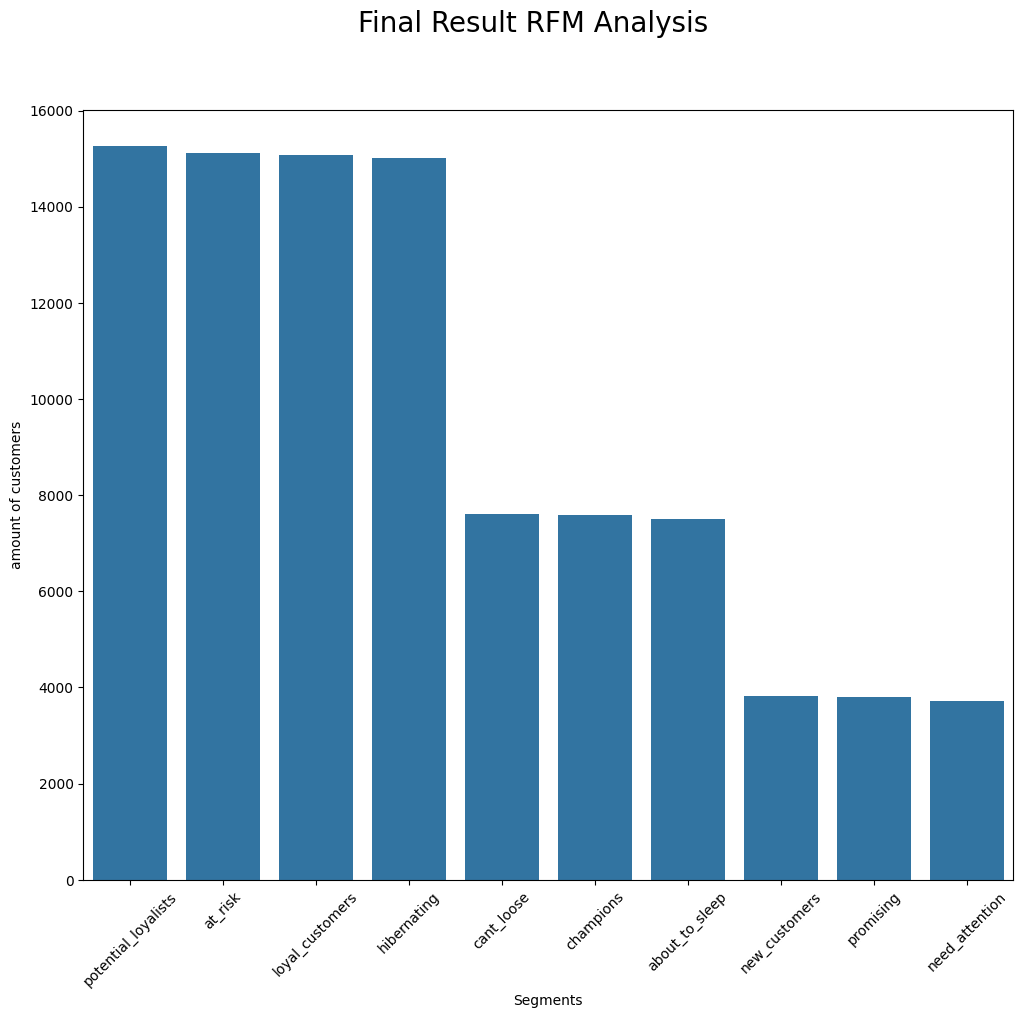

In [363]:
rfm_detail_df = rfm_df.groupby("segment").count().reset_index()
fig, ax = plt.subplots(nrows=1, figsize=(12, 10))

sns.barplot(
    y="recency", 
    x="segment",
    data=rfm_detail_df.sort_values(by="recency", ascending=False)
)
plt.ylabel("amount of customers")
plt.xlabel("Segments")
plt.xticks(rotation=45)
plt.suptitle("Final Result RFM Analysis", fontsize=20)
 

## Conclusion

**Visualisasi Data dan Explanatory**

- Berdasarkan dari tingkat kelarisan kategori produk. Kategori produk beleza_saude merupakan kategori produk terlaris. Sedangkan kategori produk seguros_e_servicos merupakan kategori produk yang paling tidak laris.
- Berdasarkan visualisasi data untuk tingkat pesanan tertinggi ada pada negara bagian (state) dengan kode SP, lalu disusul oleh RJ, MG dan seterusnya.
- Berdasarkan hasil visualisasi, didapatkan bahwa durasi pengiriman produk hingga ke tangan pelanggan merupakan salah satu hal yang berpengaruh terhadap tingkat peringkat (skor review) yang diberikan oleh pelanggan.

**Analisis Lanjutan**

- Berdasarkan visualisasi Best Customer Based on RFM Parameters (customer_id) didapatkan customer_id yang waktu pembeliannya terkini(recency), customer_id dengan jumlah pemesanan terbanyak (frequency), serta customer_id dengan jumlah pembelian tertinggi(monetary)
- Berdasarkan visualisasi RFM ANALYSIS recency didapatkan bahwa cukup banyak pelanggan yang sudah lama tidak melakukan pembelian Kembali. Selanjutnya dari segi Frequency, didapatkan bahwa keseluruhan segmentasi pelanggan rata-rata hanya melakukan pembelian sebanyak 1 kali. Terakhir untuk Monetary. Terdapat pelanggan dalam kategori at_risk yang perlu diperhatikan karena pelanggan tersebut memberikan pendapatan yang cukup tinggi kepada perusahaan.
- Berdasarkan visualisasi Final Result RFM Analysis didapatkan detail jumlah pelanggan yang berada dalam segmentasi tertentu. Didapatkan juga jumlah cukup banyak pelanggan dalam kategori at_risk dan hibernating. Sehingga perlu dilakukan langkah lebih lanjut.